# Web Economics Coursework

## Question 1: Individual data exploration

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv("/Users/mengwei.zhang/Desktop/COMPGW02 WE/Couesework/data/OneDrive_2018-02-25/train.csv")
test= pd.read_csv("/Users/mengwei.zhang/Desktop/COMPGW02 WE/Couesework/data/OneDrive_2018-02-25/test.csv")
validation= pd.read_csv("/Users/mengwei.zhang/Desktop/COMPGW02 WE/Couesework/data/OneDrive_2018-02-25/validation.csv")

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [4]:
print('The shapes:  train:', train.shape, ',test:', test.shape, ',validation:', validation.shape)

The shapes:  train: (2430981, 25) ,test: (303375, 22) ,validation: (303925, 25)


In [5]:
# give a table of the content, type, mean...
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(11), object(14)
memory usage: 463.7+ MB


In [8]:
train.head(50)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,null
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,trqRTuxoGQdcFNKbuKz,bdbc836b2f86c0391bd2f1e1e50739b3,null,mm_10024662_3445902_11178345,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3,3FKElpuEMusyJqKbuKz,6957deb8d83340086ef3cb2abd9c7198,null,Fashion_F_Width1,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,trqRTvp8gIc7gspy,4c70d1fc007d5349286f58da6d08fa9,null,mm_33208362_3404787_11119183,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,ersbQv1RdoTy1m58uG,cbec43b96a01da4a0e06cc78d483a24f,null,ALLINONE_F_Width1,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3,ersbQv1RdoTy1m58uG,1b2f87d6f3b8b473afe7e9fbe597afca,null,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [9]:
print(train.isnull().sum())

click             0
weekday           0
hour              0
bidid             0
userid            0
useragent         0
IP                0
region            0
city              0
adexchange        0
domain            0
url               0
urlid             0
slotid            0
slotwidth         0
slotheight        0
slotvisibility    0
slotformat        0
slotprice         0
creative          0
bidprice          0
payprice          0
keypage           0
advertiser        0
usertag           0
dtype: int64


In [7]:
train.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [10]:
def print_different_values(dataframe):
    print ("total number of datapoints : "+str(len(dataframe)))
    for i in dataframe.columns:
        set_col=len(dataframe[i].value_counts())
        print ("%s has %d different points." %(i,set_col))

print_different_values(train)

total number of datapoints : 2430981
click has 2 different points.
weekday has 7 different points.
hour has 24 different points.
bidid has 2430981 different points.
userid has 2342677 different points.
useragent has 38 different points.
IP has 503975 different points.
region has 35 different points.
city has 370 different points.
adexchange has 5 different points.
domain has 23013 different points.
url has 763961 different points.
urlid has 1 different points.
slotid has 52283 different points.
slotwidth has 21 different points.
slotheight has 14 different points.
slotvisibility has 11 different points.
slotformat has 4 different points.
slotprice has 286 different points.
creative has 131 different points.
bidprice has 8 different points.
payprice has 301 different points.
keypage has 19 different points.
advertiser has 9 different points.
usertag has 744036 different points.


In [11]:
print('Unique values:')
print('click:', train.click.value_counts(),'\n')
print('weekday:', train.weekday.value_counts(),'\n')
print('hour:', train.hour.value_counts(),'\n')
# print('bidid:', train.bidid.value_counts(),'\n')
# print('userid:', train.userid.value_counts(),'\n')
print('useragent:', train.useragent.value_counts(),'\n')
print('IP:', train.IP.value_counts(),'\n')
print('region:', train.region.value_counts(),'\n')
print('city:', train.city.value_counts(),'\n')
print('adexchange:', train.adexchange.value_counts(),'\n')
print('urlid:', train.urlid.value_counts(),'\n')

Unique values:
click: 0    2429188
1       1793
Name: click, dtype: int64 

weekday: 0    420955
1    368164
5    340642
3    339627
6    339137
4    326018
2    296438
Name: weekday, dtype: int64 

hour: 0     177163
18    155149
22    153756
16    149807
15    148867
17    143504
13    140443
14    132772
12    128602
11    128548
10    127319
20    121228
19    120318
23    113738
21    102075
9      82399
8      69197
1      60331
7      46490
2      34361
3      33126
6      23047
5      19867
4      18874
Name: hour, dtype: int64 

useragent: windows_ie          1461665
windows_chrome       794572
android_safari        61577
mac_safari            37401
windows_firefox       22271
windows_theworld      14025
windows_other         11133
mac_other              7785
windows_maxthon        7416
windows_opera          2197
mac_chrome             1941
android_other          1821
other_other            1652
windows_safari         1612
linux_chrome            983
mac_firefox             7

city: 219    109078
1      102388
217     94951
79      63513
275     53440
0       51788
277     49003
85      47162
233     37905
2       37695
334     36365
81      33086
184     32024
95      31589
165     29097
222     27310
148     24207
4       23899
82      22631
96      20598
147     20529
202     20059
97      19867
129     19426
239     19172
56      18252
41      17926
66      16896
125     16669
16      15339
107     14958
42      14878
9       14674
227     14648
216     14558
220     14448
234     14438
309     14365
84      14216
101     14111
152     14043
126     13623
393     13425
135     13056
153     12801
104     12033
5       11572
223     11441
83      11360
375     11312
159     11300
254     10902
221     10884
8       10013
98       9784
345      9615
154      9529
57       9358
13       9357
299      9325
167      9250
100      8969
149      8907
86       8842
7        8560
282      8390
224      8331
12       7997
106      7927
90       7840
171      7253


### Plots


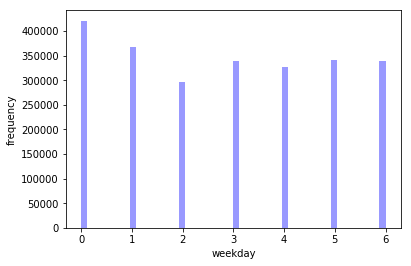

In [14]:
sns.distplot(train['weekday'], kde=False, color='b')
# plt.hist(train['weekday'],13, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('weekday',ha='center')
plt.ylabel('frequency',ha='center')
plt.savefig('./plots/weekday.png')
# train['weekday'].plot(kind='hist', stacked=True, bins=13)


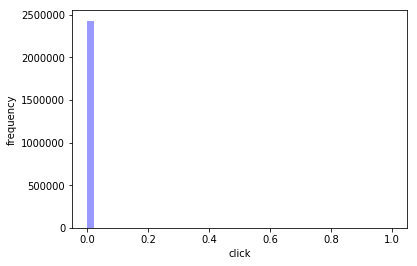

In [15]:
sns.distplot(train['click'], kde=False, color='b')
# plt.hist(train['click'],13, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('click',ha='center')
plt.ylabel('frequency',ha='center')
plt.savefig('./plots/click.png')

In [16]:
train.columns
print(train.adexchange.unique(),'\n')

['2' '1' '3' '4' 'null'] 



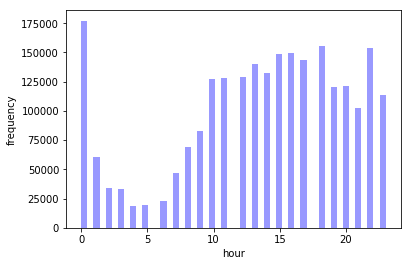

In [17]:
# plt.hist(train['hour'],47, normed=1, facecolor='blue', alpha=0.75)
sns.distplot(train['hour'], kde=False, color='b')
plt.xlabel('hour',ha='center')
plt.ylabel('frequency',ha='center')
plt.savefig('./plots/hour.png')

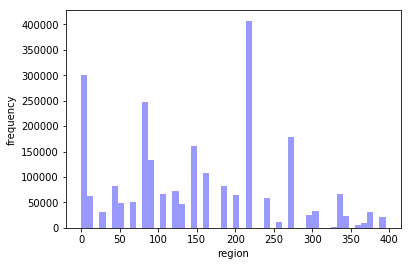

In [21]:
# plt.figure(figsize=(15,5))
sns.distplot(train['region'], kde=False, color='b')
# plt.hist(train['region'],68, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('region',ha='center')
plt.ylabel('frequency',ha='center')
plt.savefig('./plots/region.png')

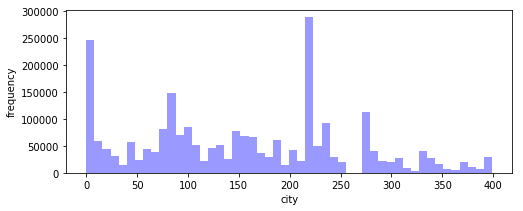

In [27]:
plt.figure(figsize=(8,3))
sns.distplot(train['city'], kde=False, color='b')
# plt.hist(train['city'],68, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('city',ha='center')
plt.ylabel('frequency',ha='center')
plt.savefig('./plots/city.png')

In [28]:
train.adexchange[train.adexchange == 'null']= 0
train['adexchange']
print(train['adexchange'].value_counts(),'\n')


/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3    819458
2    763428
1    718271
4     79995
0     49829
Name: adexchange, dtype: int64 



### Adversiter

In [29]:
train['advertiser'].value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [32]:
advertisers = train.groupby(['advertiser'])
advertisers.describe()


bidprice                                                           \
               count        mean       std    min    25%    50%    75%    max   
advertiser                                                                      
1458        492353.0  300.000000  0.000000  300.0  300.0  300.0  300.0  300.0   
2259        133673.0  288.078939  8.099356  277.0  277.0  294.0  294.0  294.0   
2261        110122.0  287.877981  8.160626  277.0  277.0  294.0  294.0  294.0   
2821        211366.0  290.224894  7.065806  277.0  294.0  294.0  294.0  294.0   
2997         49829.0  277.000000  0.000000  277.0  277.0  277.0  277.0  277.0   
3358        264956.0  232.981091  6.120661  227.0  227.0  227.0  238.0  241.0   
3386        455041.0  300.000000  0.000000  300.0  300.0  300.0  300.0  300.0   
3427        402806.0  236.388882  5.620874  227.0  227.0  238.0  241.0  241.0   
3476        310835.0  247.856152  6.470036  238.0  238.0  249.0  254.0  254.0   

                city                                                      \
               count        mean         std    min    25%    50%    75%   
advertiser                                                                 
1458        492353.0  149.355330  103.588528    0.0   76.0  146.0  220.0   
2259        133673.0  222.848391    6.289016  216.0  217.0  219.0  227.0   
2261        110122.0  143.821925  110.932325    0.0   54.0  129.0  219.0   
2821        211366.0  145.679632  106.550401    0.0   65.0  135.0  219.0   
2997         49829.0  157.645748   95.286221    0.0   85.0  165.0  220.0   
3358        264956.0  157.709752  106.374612    0.0   79.0  151.0  227.0   
3386        455041.0  149.961441  105.130898    0.0   75.0  146.0  221.0   
3427        402806.0  151.283074  104.915143    0.0   79.0  147.0  222.0   
3476        310835.0  149.276166  102.987303    0.0   79.0  145.0  220.0   

                      click                                               \
              max     count      mean       std  min  25%  50%  75%  max   
advertiser                                                                 
1458        399.0  492353.0  0.000782  0.027953  0.0  0.0  0.0  0.0  1.0   
2259        237.0  133673.0  0.000322  0.017933  0.0  0.0  0.0  0.0  1.0   
2261        399.0  110122.0  0.000327  0.018078  0.0  0.0  0.0  0.0  1.0   
2821        399.0  211366.0  0.000620  0.024888  0.0  0.0  0.0  0.0  1.0   
2997        399.0   49829.0  0.004355  0.065848  0.0  0.0  0.0  0.0  1.0   
3358        399.0  264956.0  0.000762  0.027601  0.0  0.0  0.0  0.0  1.0   
3386        399.0  455041.0  0.000703  0.026509  0.0  0.0  0.0  0.0  1.0   
3427        399.0  402806.0  0.000675  0.025977  0.0  0.0  0.0  0.0  1.0   
3476        399.0  310835.0  0.000602  0.024520  0.0  0.0  0.0  0.0  1.0   

                hour ...  slotheight slotprice                             \
               count ...         max     count       mean        std  min   
advertiser           ...                                                    
1458        492353.0 ...       600.0  492353.0  28.275305  37.933767  0.0   
2259        133673.0 ...       600.0  133673.0  24.529157  38.597758  0.0   
2261        110122.0 ...       600.0  110122.0  27.127967  46.621989  0.0   
2821        211366.0 ...       600.0  211366.0  23.308943  38.815071  0.0   
2997         49829.0 ...        50.0   49829.0  33.779586  46.163436  4.0   
3358        264956.0 ...       600.0  264956.0  17.419896  32.403285  0.0   
3386        455041.0 ...       600.0  455041.0  29.499239  36.788689  0.0   
3427        402806.0 ...       600.0  402806.0  29.293809  35.423932  0.0   
3476        310835.0 ...       600.0  310835.0  26.748307  32.533266  0.0   

                                   slotwidth                                 \
            25%   50%   75%    max     count        mean         std    min   
advertiser                                                                    
1458        0.0   5.0  59.0  300.0  492353.0  596.5

In [38]:
print('From tarining set: \n')
# Num click:
num_clics=len(train[train.click==1])
print ("Clicks: %d"%num_clics)
# number of impressions:
num_impressions=len(train)
print ("Impressions: %d"%num_impressions)
# Click through Rate: number of Clicks / number ofImpressions
CTR=num_clics/num_impressions
print ("CTR: {:.4%}".format(CTR))   # Showing in percentage!

print('\nFrom validation set: \n')
# Num click:
num_clics=len(validation[validation.click==1])
print ("Clicks: %d"%num_clics)
# number of impressions:
num_impressions=len(validation)
print ("Impressions: %d"%num_impressions)
# Click through Rate: number of Clicks / number ofImpressions
CTR=num_clics/num_impressions
print ("CTR: {:.4%}".format(CTR))   # Showing in percentage!

From tarining set: 

Clicks: 1793
Impressions: 2430981
CTR: 0.0738%

From validation set: 

Clicks: 202
Impressions: 303925
CTR: 0.0665%


In [39]:
# Groupby functions:
def plot_ctr(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(6,6))
    for list_advert in list_advert_tot:
        mean_data=train.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]

        # STD:
        std_data=train.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]

        # Totals:
        totals=train.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]

        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
    plt.legend(list_advert_tot, loc=0)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.savefig('./plots/click-slotheight.png')
    
    

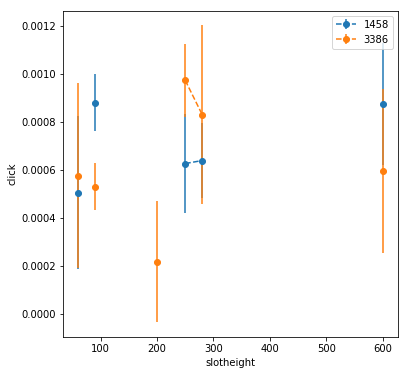

In [40]:
x= "slotheight"
y="click"
list_advert=[1458,3386]
adv="advertiser"
plot_ctr(train,y,x,list_advert)

In [41]:
mean_data=train.groupby(['weekday','advertiser']).mean()
print(mean_data)
# ts_mean=mean_data.unstack(adv)[y][list_advert]

                       click       hour      region        city   slotwidth  \
weekday advertiser                                                            
0       1458        0.000681  14.189022  144.178154  149.160059  511.887419   
        2259        0.000365  10.879813  216.000000  222.630997  482.640812   
        2821        0.000700  20.567103  143.172543  147.863413  606.167579   
        3358        0.000746  11.647607  153.104325  157.992848  456.265049   
        3386        0.000748  13.769450  144.031950  148.759557  506.122437   
        3427        0.000578  11.948489  144.848953  149.818245  520.824223   
        3476        0.000548  14.149594  143.736111  148.327693  492.180854   
1       1458        0.000951  14.377508  146.638418  151.687116  605.542275   
        2259        0.000333  11.212889  216.000000  222.543845  508.310299   
        2821        0.000559  12.036731  139.646752  144.150364  619.567507   
        3358        0.000599  11.955282  150.201250 

In [43]:
# ### Pareto
# #### In Pareto, we can easily see who are the main factors that control the Payprice or the Clicks
# - Main conclusions:
#     1. 3 out of 9 advertisers (33%) are responsible for 51.9% of the pay prices
#     2. 37 out of 370 cities (10%) are responsible for 50.1% of the pay prices
#     3. 14 out of 35 regions (40%) are responsible for 71.4% of the click!
# 
def pareto(dataframe):
    sumpayprice = train.click.sum()
    for i in dataframe.columns:
        if len(dataframe[i].value_counts()) <= 400 and len(dataframe[i].value_counts())>2 :
            print ("-----------",i,"-----------")
            temp = train.groupby(i)["click"].sum().sort_values(ascending=False)
            temp = temp.to_dict()
            pareto = 0.0
            count = 0.0
            for j in temp:
                count = (count+1)
                countp = (count/len(temp))*100
                pareto = temp[j]/sumpayprice*100 + pareto
                print(j,temp[j],round(temp[j]/sumpayprice*100,2),round(pareto,2),round(countp,2))
# print the count of each value, count percentage of all, percentage of click=1, cumulative values
pareto(train)

----------- weekday -----------
2 286 15.95 15.95 14.29
3 283 15.78 31.73 28.57
0 271 15.11 46.85 42.86
4 264 14.72 61.57 57.14
1 249 13.89 75.46 71.43
5 247 13.78 89.24 85.71
6 193 10.76 100.0 100.0
----------- hour -----------
18 156 8.7 8.7 4.17
17 146 8.14 16.84 8.33
22 138 7.7 24.54 12.5
16 124 6.92 31.46 16.67
0 122 6.8 38.26 20.83
19 119 6.64 44.9 25.0
13 114 6.36 51.25 29.17
23 102 5.69 56.94 33.33
15 92 5.13 62.07 37.5
21 92 5.13 67.21 41.67
20 91 5.08 72.28 45.83
14 81 4.52 76.8 50.0
12 71 3.96 80.76 54.17
10 70 3.9 84.66 58.33
11 65 3.63 88.29 62.5
9 42 2.34 90.63 66.67
1 33 1.84 92.47 70.83
7 32 1.78 94.26 75.0
8 31 1.73 95.98 79.17
2 23 1.28 97.27 83.33
5 16 0.89 98.16 87.5
3 15 0.84 99.0 91.67
4 12 0.67 99.67 95.83
6 6 0.33 100.0 100.0
----------- useragent -----------
windows_ie 944 52.65 52.65 2.63
windows_chrome 350 19.52 72.17 5.26
android_safari 298 16.62 88.79 7.89
mac_safari 121 6.75 95.54 10.53
mac_other 24 1.34 96.88 13.16
android_other 12 0.67 97.55 15.79
window

250 549 30.62 72.62 14.29
50 217 12.1 84.72 21.43
280 137 7.64 92.36 28.57
600 89 4.96 97.32 35.71
60 26 1.45 98.77 42.86
200 11 0.61 99.39 50.0
300 5 0.28 99.67 57.14
240 4 0.22 99.89 64.29
125 1 0.06 99.94 71.43
80 1 0.06 100.0 78.57
230 0 0.0 100.0 85.71
150 0 0.0 100.0 92.86
100 0 0.0 100.0 100.0
----------- slotvisibility -----------
0 697 38.87 38.87 9.09
1 334 18.63 57.5 18.18
2 323 18.01 75.52 27.27
FirstView 260 14.5 90.02 36.36
Na 101 5.63 95.65 45.45
OtherView 43 2.4 98.05 54.55
255 12 0.67 98.72 63.64
SecondView 11 0.61 99.33 72.73
ThirdView 8 0.45 99.78 81.82
FourthView 4 0.22 100.0 90.91
FifthView 0 0.0 100.0 100.0
----------- slotformat -----------
0 822 45.84 45.84 25.0
1 433 24.15 69.99 50.0
Na 427 23.81 93.81 75.0
5 111 6.19 100.0 100.0
----------- slotprice -----------
0 609 33.97 33.97 0.35
5 312 17.4 51.37 0.7
70 311 17.35 68.71 1.05
50 84 4.68 73.4 1.4
6 83 4.63 78.03 1.75
80 79 4.41 82.43 2.1
20 53 2.96 85.39 2.45
31 23 1.28 86.67 2.8
148 20 1.12 87.79 3.15
30 18

7314 2 0.11 99.27 63.36
12631 1 0.06 99.33 64.12
12612 1 0.06 99.39 64.89
12616 1 0.06 99.44 65.65
011c1a3d4d3f089a54f9b70a4c0a6eb3 1 0.06 99.5 66.41
12626 1 0.06 99.55 67.18
16ff51916f0c796ec72eefc633c4a8ed 1 0.06 99.61 67.94
0055e8503dc053435b3599fe44af118b 1 0.06 99.67 68.7
23485fcd23122d755d38f8c89d46ca56 1 0.06 99.72 69.47
7328 1 0.06 99.78 70.23
cd6f20e0b2a699c352f2e55a7a2091fd 1 0.06 99.83 70.99
bac72fe483c04a0ea2490539b4d06e6a 1 0.06 99.89 71.76
7eb0065067225fa5f511f7ffb9895f24 1 0.06 99.94 72.52
7321 1 0.06 100.0 73.28
672fd361820651d4d99b47d7bf48d715 0 0.0 100.0 74.05
10721 0 0.0 100.0 74.81
7325 0 0.0 100.0 75.57
7327 0 0.0 100.0 76.34
12632 0 0.0 100.0 77.1
7331 0 0.0 100.0 77.86
7332 0 0.0 100.0 78.63
7333 0 0.0 100.0 79.39
7334 0 0.0 100.0 80.15
7324 0 0.0 100.0 80.92
6455a6f45433aef94075f34dafd8d3bf 0 0.0 100.0 81.68
87945ed58e806dbdc291b3662f581354 0 0.0 100.0 82.44
54c6e2569e059cf336f7e7742b44c3ba 0 0.0 100.0 83.21
48c6405fa5bdecc850ea6ef5e6cf4da5 0 0.0 100.0 83.97
e10

a3becb967c015e9acb5e72f22b100ef8 9 0.5 98.05 57.89
9be83422522025c09a44593ecd1af8ca 9 0.5 98.55 63.16
d4fc4aa65f6670f7fea6862f27084fbc 7 0.39 98.94 68.42
aa4976c67db0f076c563a29f6697928b 5 0.28 99.22 73.68
d41d8cd98f00b204e9800998ecf8427e 4 0.22 99.44 78.95
15b749127478946f161a54dc0dad27c8 4 0.22 99.67 84.21
4f8e1c55abc204c2c8f1296dbc223af3 3 0.17 99.83 89.47
a8f8eeaae5c1e2e9924328e78d9925a5 2 0.11 99.94 94.74
7e0e909ea89f707bc20f9585c9072081 1 0.06 100.0 100.0
----------- advertiser -----------
1458 385 21.47 21.47 11.11
3386 320 17.85 39.32 22.22
3427 272 15.17 54.49 33.33
2997 217 12.1 66.59 44.44
3358 202 11.27 77.86 55.56
3476 187 10.43 88.29 66.67
2821 131 7.31 95.59 77.78
2259 43 2.4 97.99 88.89
2261 36 2.01 100.0 100.0


In [44]:
# ### Pivot Table
# #### The values shows the clicks each day for each advertiser
# - The main points are :
#     1. Distribution among days
#     2. Some advertisers have no activity in some days
#     3. We can easily change weekday to hours and see the distribution during the day and this important because we can profile our customers eg. kids, adults and etc.

pivotable = pd.pivot_table(train, values='click', index=['weekday'],columns=['advertiser'], aggfunc=np.sum)
pivotable

advertiser,1458,2259,2261,2821,2997,3358,3386,3427,3476
weekday,,,,,,,,,
0,52.0,13.0,NaN,70.0,NaN,22.0,53.0,29.0,32.0
1,63.0,9.0,NaN,47.0,NaN,16.0,44.0,33.0,37.0
2,48.0,NaN,NaN,14.0,94.0,6.0,47.0,43.0,34.0
3,52.0,NaN,8.0,NaN,46.0,73.0,42.0,42.0,20.0
4,62.0,NaN,10.0,NaN,48.0,27.0,48.0,36.0,33.0
5,62.0,10.0,12.0,NaN,29.0,38.0,52.0,40.0,4.0
6,46.0,11.0,6.0,NaN,NaN,20.0,34.0,49.0,27.0


### CTR and other index

In [ ]:
# Table3 = [CPA,IPA,Cost,CTR,CPM,eCPC]
# # Table3 = pd.concat(Table3,axis=1)
# # Table3.columns = ['Clicks','Impressions','Cost','CTR','CPM','eCPC']
# Table3

In [62]:

# SECOND VERSION OF THE INDEX ANALYSIS WHICH INCLUDES CTR AND ETC.
# USED TO CHECK THE CONSENSUS WITH THE PREVIOUS ONE
# only clicks are the same

data = pd.DataFrame()
data['advertiser_id'] = np.sort(train.advertiser.unique())

data['impressions'] = train.groupby('advertiser').url.nunique().values 
# nunique, number of unique
click = train.groupby('advertiser').click.value_counts()
data['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
data['cost'] = [entry.sum() for entry in train.groupby('advertiser').payprice.unique()]
#data['win_ratio'] = (((data.impressions / data.bids) * 100).round(2)).astype(str) + '%'
data['CTR'] = (((data.clicks / data.impressions) * 100).round(3)).astype(str) + '%'
data['CPM'] = (((data.cost / data.impressions) * 1000).round(2)).astype(str)
data['eCPC'] = ((data.cost / data.clicks).round(2)).astype(str)
#abc = train.groupby(['advertiser','weekday']).click.value_counts()

In [63]:
print(train.groupby('advertiser').click.value_counts())
# data['test']

advertiser  click
1458        0        491968
            1           385
2259        0        133630
            1            43
2261        0        110086
            1            36
2821        0        211235
            1           131
2997        0         49612
            1           217
3358        0        264754
            1           202
3386        0        454721
            1           320
3427        0        402534
            1           272
3476        0        310648
            1           187
Name: click, dtype: int64


In [64]:
data

,advertiser_id,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,164550,385,45149,0.234%,274.38,117.27
1,2259,68321,43,43365,0.063%,634.72,1008.49
2,2261,52013,36,43365,0.069%,833.73,1204.58
3,2821,106555,131,43365,0.123%,406.97,331.03
4,2997,3717,217,38497,5.838%,10357.01,177.41
5,3358,118717,202,27787,0.17%,234.06,137.56
6,3386,163132,320,45150,0.196%,276.77,141.09
7,3427,150245,272,27787,0.181%,184.94,102.16
8,3476,119248,187,31164,0.157%,261.34,166.65


In [65]:
# 1. Analyzing CTR per day of the week

CTR = pd.DataFrame()
CTR['day'] = np.sort(train.weekday.unique())

week = train.groupby('weekday')
week_advertiser= train.groupby(['advertiser','weekday'])

click_count1 = week.click.value_counts()
click_count2 = week_advertiser.click.value_counts()

totalclicks_1458 = click_count2.iloc[click_count2.index.get_level_values('advertiser') == 1458]
CTR['totalclicks_1458'] = totalclicks_1458.iloc[totalclicks_1458.index.get_level_values('click') == 1].values

totalclicks_3386 = click_count2.iloc[click_count2.index.get_level_values('advertiser') == 3386]
CTR['totalclicks_3386'] = totalclicks_3386.iloc[totalclicks_3386.index.get_level_values('click') == 1].values

total_impressions_advertiser = week.advertiser.value_counts()
CTR['total_impressions_1458'] = total_impressions_advertiser.iloc[total_impressions_advertiser.index.get_level_values('advertiser') == 1458].values

CTR['total_impressions_3386'] = total_impressions_advertiser.iloc[total_impressions_advertiser.index.get_level_values('advertiser') == 3386].values

CTR['CTR_1458'] = ((CTR.totalclicks_1458 / CTR.total_impressions_1458) * 100).round(4)
CTR['CTR_3386'] = ((CTR.totalclicks_3386 / CTR.total_impressions_3386) * 100).round(4)
CTR

,day,totalclicks_1458,totalclicks_3386,total_impressions_1458,total_impressions_3386,CTR_1458,CTR_3386
0,0,52,53,76372,70861,0.0681,0.0748
1,1,63,44,66245,61159,0.0951,0.0719
2,2,48,47,67985,63159,0.0706,0.0744
3,3,52,42,68874,61468,0.0755,0.0683
4,4,62,48,69881,65854,0.0887,0.0729
5,5,62,52,71634,62668,0.0866,0.0830
6,6,46,34,71362,69872,0.0645,0.0487


In [66]:
CTR_d1 = CTR[['day','CTR_1458']]
CTR_d1['user'] = 1458
CTR_d1.rename(index=str, columns={'CTR_1458':'CTR'}, inplace=True)
CTR_d2 = CTR[['day','CTR_3386']]
CTR_d2['user'] = 3386
CTR_d2.rename(index=str, columns={'CTR_3386':'CTR'}, inplace=True)

CTR_d1 = CTR_d1.append(CTR_d2)

/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

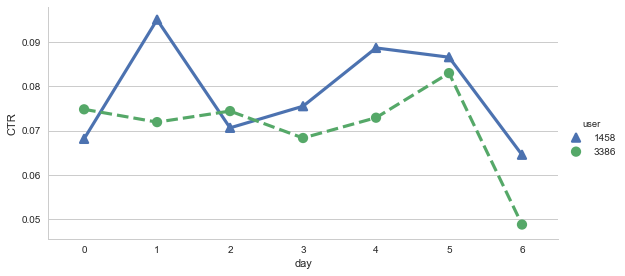

In [68]:
sns.set(style="whitegrid")
ax2 = sns.factorplot(x='day', y='CTR', data=CTR_d1, hue='user',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
ax2.savefig('./plots/ctr-day.png')

In [70]:
# 2. Analyzing CTR per hour

CTR2 = pd.DataFrame()
CTR2['hour'] = np.sort(train.hour.unique())

hour = train.groupby('hour')
hour_advertiser= train.groupby(['advertiser','hour'])


click_count3 = hour_advertiser.click.value_counts()
click_count4 = hour.click.value_counts()

totalclicks_1458 = click_count3.iloc[click_count3.index.get_level_values('advertiser') == 1458]
CTR2['totalclicks_1458'] = totalclicks_1458.iloc[totalclicks_1458.index.get_level_values('click') == 1].values

totalclicks_3386 = click_count3.iloc[click_count3.index.get_level_values('advertiser') == 3386]
clicks_3386 = list(totalclicks_3386.iloc[totalclicks_3386.index.get_level_values('click') == 1].values)
clicks_3386 = clicks_3386[:4] + [0] + clicks_3386[4:]
CTR2['totalclicks_3386']= clicks_3386

impressions_hour = hour.advertiser.value_counts()
CTR2['total_impressions_1458'] = impressions_hour.iloc[impressions_hour.index.get_level_values('advertiser') == 1458].values

CTR2['total_impressions_3386'] = impressions_hour.iloc[impressions_hour.index.get_level_values('advertiser') == 3386].values

CTR2['CTR_1458'] = ((CTR2.totalclicks_1458 / CTR2.total_impressions_1458) * 100).round(4)
CTR2['CTR_3386'] = ((CTR2.totalclicks_3386 / CTR2.total_impressions_3386) * 100).round(4)
CTR2


,hour,totalclicks_1458,totalclicks_3386,total_impressions_1458,total_impressions_3386,CTR_1458,CTR_3386
0,0,23,31,22945,35649,0.1002,0.0870
1,1,6,6,9900,8776,0.0606,0.0684
2,2,7,2,6064,5587,0.1154,0.0358
3,3,3,1,6517,5684,0.0460,0.0176
4,4,3,0,3324,3575,0.0903,0.0000
5,5,6,2,3751,3139,0.1600,0.0637
6,6,4,4,4626,2600,0.0865,0.1538
7,7,7,6,9745,8743,0.0718,0.0686
8,8,13,2,14401,12165,0.0903,0.0164
9,9,16,5,18046,13007,0.0887,0.0384


/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

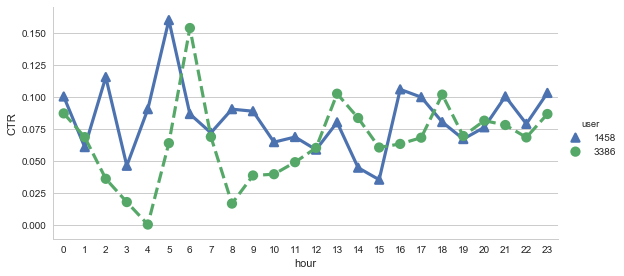

In [71]:
CTR_h1 = CTR2[['hour','CTR_1458']]
CTR_h1['user'] = 1458
CTR_h1.rename(index=str, columns={'CTR_1458':'CTR'}, inplace=True)
CTR_h2 = CTR2[['hour','CTR_3386']]
CTR_h2['user'] = 3386
CTR_h2.rename(index=str, columns={'CTR_3386':'CTR'}, inplace=True)

CTR_h1 = CTR_h1.append(CTR_h2)

sns.set(style="whitegrid")
ax3=sns.factorplot(x='hour', y='CTR', data=CTR_h1, hue='user',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=2)


ax3.savefig('./plots/ctr-hour.png')


In [72]:
CTR3 = pd.DataFrame()
CTR3['region'] = np.sort(train.region.unique())

region = train.groupby('region')
region_advertiser= train.groupby(['advertiser','region'])

impressions = region.advertiser.value_counts()
click_countR = region_advertiser.click.value_counts()

totalclicks_1458 = click_countR.iloc[click_countR.index.get_level_values('advertiser') == 1458]
totalclicks_1458.iloc[totalclicks_1458.index.get_level_values('click') == 0]=0
CTR3['totalclicks_1458'] = totalclicks_1458.groupby(level='region').sum().values

totalclicks_3386 = click_countR.iloc[click_countR.index.get_level_values('advertiser') == 3386]
totalclicks_3386.iloc[totalclicks_3386.index.get_level_values('click') == 0]=0
CTR3['totalclicks_3386'] = totalclicks_3386.groupby(level='region').sum().values
# CTR3['totalclicks_3358'] = totalclicks_3358.iloc[totalclicks_3358.index.get_level_values('click') == 1].values

CTR3['total_impressions_1458'] = impressions.iloc[impressions.index.get_level_values('advertiser') == 1458].values

CTR3['total_impressions_3386'] = impressions.iloc[impressions.index.get_level_values('advertiser') == 3386].values

CTR3['CTR_1458'] = ((CTR3.totalclicks_1458 / CTR3.total_impressions_1458) * 100).round(4)
CTR3['CTR_3386'] = ((CTR3.totalclicks_3386 / CTR3.total_impressions_3386) * 100).round(4)

/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/mengwei.zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

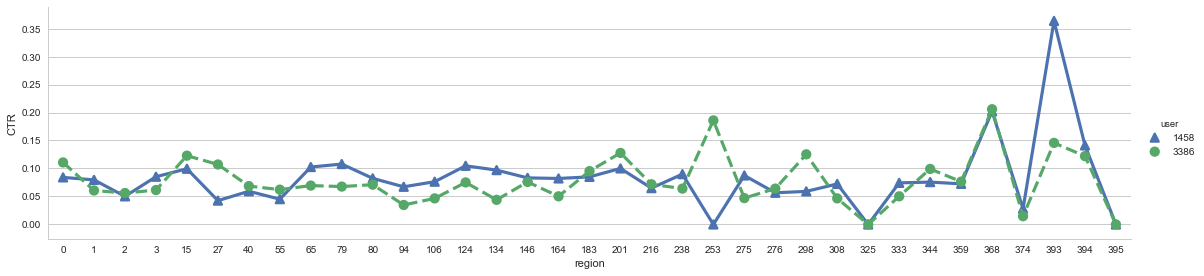

In [73]:
CTR_h1 = CTR3[['region','CTR_1458']]
CTR_h1['user'] = 1458
CTR_h1.rename(index=str, columns={'CTR_1458':'CTR'}, inplace=True)
CTR_h2 = CTR3[['region','CTR_3386']]
CTR_h2['user'] = 3386
CTR_h2.rename(index=str, columns={'CTR_3386':'CTR'}, inplace=True)

CTR_h1 = CTR_h1.append(CTR_h2)

sns.set(style="whitegrid")
ax4=sns.factorplot(x='region', y='CTR', data=CTR_h1, hue='user',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=4)
ax4.savefig('./plots/ctr-region.png')


### EPEC 
equilibrium problem with equilibrium constraints.

the top two advertiser is 1458 and 3386

In [82]:
EPEC = pd.DataFrame()
EPEC['day'] = np.sort(train.weekday.unique())

#click = train.groupby('weekday').click.value_counts()

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
EPEC['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values


#payprice_1458 = train.groupby(['weekday','advertiser']).payprice.sum()
#EPEC['payprice_1458'] = payprice_1458.iloc[payprice_1458.index.get_level_values('advertiser') == 1458].values

payprice_1458 = train.groupby(['weekday','advertiser']).payprice.sum()
EPEC['payprice_1458'] = payprice_1458.iloc[payprice_1458.index.get_level_values('advertiser') == 1458].values

#EPEC['ECPC_1458'] = ((EPEC.payprice_1458 / EPEC.imps_1458) * 100).round(3)
EPEC['ECPC_1458_weekday'] = ((EPEC.payprice_1458 / EPEC.clicks_1458) * 100).round(3)

In [83]:
EPEC

,day,clicks_1458,payprice_1458,ECPC_1458_weekday
0,0,52,4835842,9.299696e+06
1,1,63,4921047,7.811186e+06
2,2,48,4916029,1.024173e+07
3,3,52,4810175,9.250337e+06
4,4,62,4835363,7.798973e+06
5,5,62,4861945,7.841847e+06
6,6,46,4788335,1.040942e+07


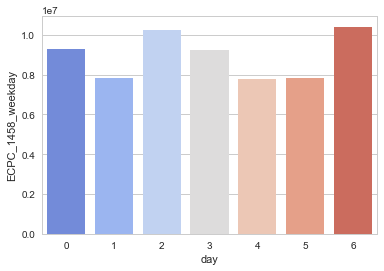

In [84]:
# Boxplot of eCPC for advertiser 3386 for weekdays
a1=EPEC[['day','ECPC_1458_weekday']]

a1 = sns.barplot(a1.day, a1.ECPC_1458_weekday, palette="coolwarm")
fig = a1.get_figure()
fig.savefig('./plots/ECPC_1458_day.png')

In [85]:
hour = pd.DataFrame()

hour['hour'] = np.sort(train.hour.unique())

payprice_hour= train.groupby(['hour','advertiser']).payprice.sum()
hour['payprice_hour'] = payprice_hour.iloc[payprice_hour.index.get_level_values('advertiser') == 1458].values

click = train.groupby(['advertiser','hour']).click.sum()
hour['clicks_1458']= click.iloc[click.index.get_level_values('advertiser') == 1458].values

hour['ECPC_1458_hour'] = ((hour.payprice_hour / hour.clicks_1458) * 100).round(3)

hour

,hour,payprice_hour,clicks_1458,ECPC_1458_hour
0,0,1505347,23,6.544987e+06
1,1,619858,6,1.033097e+07
2,2,397473,7,5.678186e+06
3,3,470030,3,1.566767e+07
4,4,227050,3,7.568333e+06
5,5,271763,6,4.529383e+06
6,6,305234,4,7.630850e+06
7,7,680710,7,9.724429e+06
8,8,1038985,13,7.992192e+06
9,9,1241422,16,7.758888e+06


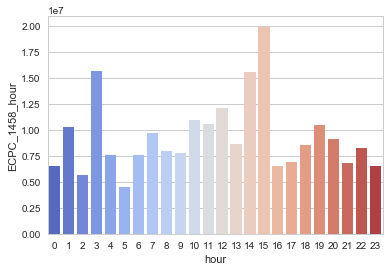

In [86]:
a2=hour[['hour','ECPC_1458_hour']]
a2 = sns.barplot(a2.hour, a2.ECPC_1458_hour, palette="coolwarm")
fig = a2.get_figure()
fig.savefig('./plots/ECPC_1458_hour.png')

In [87]:
Region = pd.DataFrame()

Region['Region'] = np.sort(train.region.unique())

payprice_Region= train.groupby(['region','advertiser']).payprice.sum()
Region['payprice_Region'] = payprice_Region.iloc[payprice_Region.index.get_level_values('advertiser') == 1458].values

click = train.groupby(['advertiser','region']).click.sum()
Region['clicks_1458']= click.iloc[click.index.get_level_values('advertiser') == 1458].values

Region['ECPC_1458_region'] = ((Region.payprice_Region / Region.clicks_1458) * 100).round(3)

Region

,Region,payprice_Region,clicks_1458,ECPC_1458_region
0,0,457854,6,7.630900e+06
1,1,1557460,17,9.161529e+06
2,2,566926,4,1.417315e+07
3,3,1715541,21,8.169243e+06
4,15,1048646,15,6.990973e+06
5,27,481169,3,1.603897e+07
6,40,1241677,11,1.128797e+07
7,55,748298,5,1.496596e+07
8,65,810676,12,6.755633e+06
9,79,1076482,14,7.689157e+06


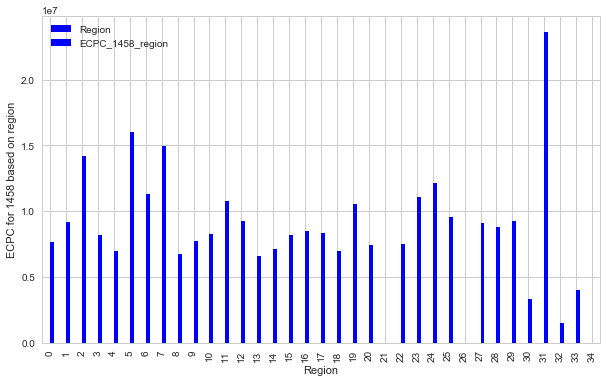

In [88]:
a2=Region[['Region','ECPC_1458_region']]
a2.plot(by='Region',kind='bar',figsize=(10,6), color= 'b')
plt.xlabel("Region")
plt.ylabel("ECPC for 1458 based on region")
plt.savefig('./plots/ECPC_1458_region.png')
plt.show()

### Price compare between 1458 and 3386

In [89]:
market = pd.DataFrame()
market['day'] = np.sort(train.weekday.unique())

#click = train.groupby('weekday').click.value_counts()

# click = train.groupby(['advertiser','weekday']).click.value_counts()
# clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
# EPEC['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values


payprice_1458 = train.groupby(['weekday','advertiser']).payprice.sum()
market['payprice_1458'] = payprice_1458.iloc[payprice_1458.index.get_level_values('advertiser') == 1458].values

payprice_3386 = train.groupby(['weekday','advertiser']).payprice.sum()
market['payprice_3386'] = payprice_3386.iloc[payprice_3386.index.get_level_values('advertiser') == 3386].values

market

,day,payprice_1458,payprice_3386
0,0,4835842,4787271
1,1,4921047,4867197
2,2,4916029,5187993
3,3,4810175,4948435
4,4,4835363,5236192
5,5,4861945,5006923
6,6,4788335,4897812


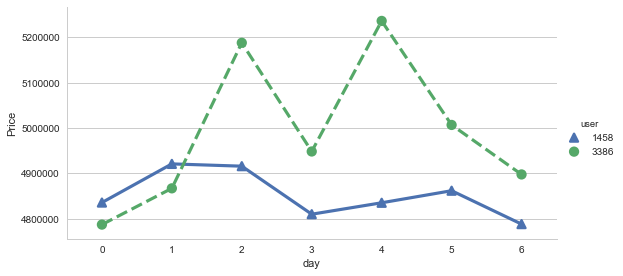

In [93]:
CTR_h1 = market[['day','payprice_1458']]
CTR_h1['user'] = 1458
CTR_h1.rename(index=str, columns={'payprice_1458':'Price'}, inplace=True)
CTR_h2 = market[['day','payprice_3386']]
CTR_h2['user'] = 3386
CTR_h2.rename(index=str, columns={'payprice_3386':'Price'}, inplace=True)

CTR_h1 = CTR_h1.append(CTR_h2)

sns.set(style="whitegrid")
ax4=sns.factorplot(x='day', y='Price', data=CTR_h1, hue='user',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=2)
ax4.savefig('./plots/payprice_day_1458_3386.png')

In [92]:
market1 = pd.DataFrame()
market1['hour'] = np.sort(train.hour.unique())

payprice = train.groupby(['hour','advertiser']).payprice.sum()
market1['payprice_1458_hour'] = payprice.iloc[payprice.index.get_level_values('advertiser') == 1458].values

market1['payprice_3386_hour'] = payprice.iloc[payprice.index.get_level_values('advertiser') == 3386].values

market1

,hour,payprice_1458_hour,payprice_3386_hour
0,0,1505347,3356419
1,1,619858,492411
2,2,397473,290073
3,3,470030,293817
4,4,227050,204544
5,5,271763,169966
6,6,305234,149996
7,7,680710,656079
8,8,1038985,968979
9,9,1241422,928308


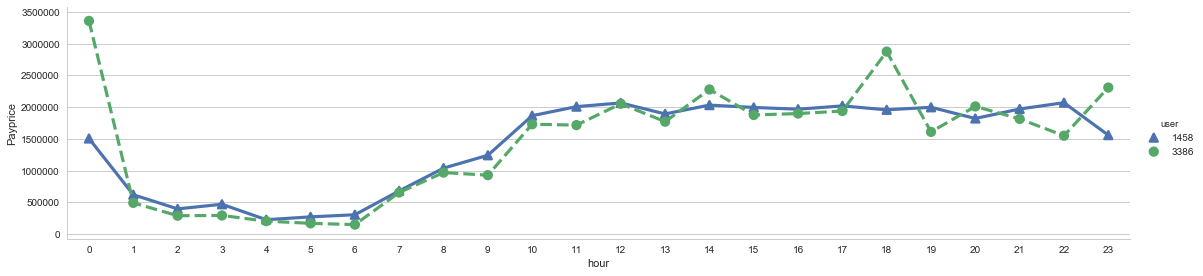

In [94]:
CTR_h1 = market1[['hour','payprice_1458_hour']]
CTR_h1['user'] = 1458
CTR_h1.rename(index=str, columns={'payprice_1458_hour':'Payprice'}, inplace=True)
CTR_h2 = market1[['hour','payprice_3386_hour']]
CTR_h2['user'] = 3386
CTR_h2.rename(index=str, columns={'payprice_3386_hour':'Payprice'}, inplace=True)

CTR_h1 = CTR_h1.append(CTR_h2)

sns.set(style="whitegrid")
ax4=sns.factorplot(x='hour', y='Payprice', data=CTR_h1, hue='user',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=4)
ax4.savefig('./plots/payprice_hour_1458_3386.png')

In [95]:
market1[['hour','payprice_3386_hour']]

,hour,payprice_3386_hour
0,0,3356419
1,1,492411
2,2,290073
3,3,293817
4,4,204544
5,5,169966
6,6,149996
7,7,656079
8,8,968979
9,9,928308
